In [350]:
import csv
import random
import numpy as np
import pandas as pd
import dask.dataframe as dd
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt   #Data visualisation libraries 
%matplotlib inline

data_folder = Path("Desktop/257_Proj")
data = pd.read_csv(data_folder / "train.csv", nrows = 10000000)

#print(data.read_text())
#data = pd.read_csv('⁨train.csv',nrows = 10000000)       # Contains the first 10 million data from 
                                                    # where we are going to select 1 million ramdom data for training and
                                                 # ten thousand data for deveopment

In [49]:
# Creation of training set , development set and test set 
training_set = data.sample(n = 1000000)    # 1 million random data from same distribution
dev_set = data.sample(n = 10000)           # 10000 random data from same distribution
test_set = pd.read_csv(data_folder / "test.csv")
#test_set =  pd.read_csv('D:\\Projects\\Data\\test.csv')      # Actual test data must be used to check only after getting 
                                                             # a good final hypothesis

# Shape, data type, data sample and descriptive statistics of Training Set

### Shape

In [277]:
training_set.shape

(999903, 9)

### Data Type

In [51]:
training_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [278]:
training_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7643707,2012-09-29 13:42:42.0000006,9.50,2012-09-29 13:42:42 UTC,-73.972029,40.765682,-73.992124,40.759216,1
3267441,2009-08-28 20:47:00.000000107,5.30,2009-08-28 20:47:00 UTC,-73.985183,40.755835,-74.000965,40.762010,1
5661889,2010-04-05 14:04:00.00000019,4.50,2010-04-05 14:04:00 UTC,-73.978722,40.724193,-73.986525,40.719412,5
5276512,2015-04-04 14:27:19.0000004,10.00,2015-04-04 14:27:19 UTC,-73.987663,40.743610,-74.005692,40.741241,6
3294883,2010-05-24 11:28:00.00000028,32.67,2010-05-24 11:28:00 UTC,0.000000,0.000000,0.000000,0.000000,2


### Descriptive statistics 

In [53]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999997.000000,999997.000000,1000000.000000
mean,11.334144,-72.480727,39.924971,-72.486971,39.913230,1.684922
std,9.875863,13.963051,9.878318,13.846063,10.678428,1.340486
min,-100.000000,-3384.693027,-3432.139393,-3366.536242,-3092.393485,0.000000
25%,6.000000,-73.992087,40.734833,-73.991410,40.733952,1.000000
50%,8.500000,-73.981837,40.752585,-73.980164,40.753128,1.000000
75%,12.500000,-73.967115,40.767094,-73.963676,40.768067,2.000000
max,850.000000,3442.185068,3310.364462,3442.185068,3305.291182,208.000000


# Shape, data type, data sample and descriptive statistics of Development Set

### Shape

In [54]:
dev_set.shape

(10000, 8)

### Data Type

In [55]:
dev_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [58]:
dev_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7643707,2012-09-29 13:42:42.0000006,9.50,2012-09-29 13:42:42 UTC,-73.972029,40.765682,-73.992124,40.759216,1
3267441,2009-08-28 20:47:00.000000107,5.30,2009-08-28 20:47:00 UTC,-73.985183,40.755835,-74.000965,40.762010,1
5661889,2010-04-05 14:04:00.00000019,4.50,2010-04-05 14:04:00 UTC,-73.978722,40.724193,-73.986525,40.719412,5
5276512,2015-04-04 14:27:19.0000004,10.00,2015-04-04 14:27:19 UTC,-73.987663,40.743610,-74.005692,40.741241,6
3294883,2010-05-24 11:28:00.00000028,32.67,2010-05-24 11:28:00 UTC,0.000000,0.000000,0.000000,0.000000,2


### Descriptive statistics 

In [59]:
dev_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,11.455454,-72.553292,39.940576,-72.479228,39.904650,1.67400
std,10.056831,10.296213,6.121308,10.539196,6.237432,1.29263
min,-3.500000,-75.418708,-73.999810,-74.703679,-74.006575,0.00000
25%,6.000000,-73.992270,40.735151,-73.991346,40.733986,1.00000
50%,8.500000,-73.981811,40.752455,-73.980185,40.753434,1.00000
75%,12.500000,-73.967517,40.766934,-73.963248,40.768201,2.00000
max,200.000000,40.766407,43.098708,40.773602,43.415190,6.00000


# Shape, data type, data sample and descriptive statistics of Test Set



### Shape

In [61]:
test_set.shape

(9914, 7)

### Data Type

In [62]:
test_set.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [63]:
test_set.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


### Descriptive statistics 

In [64]:
test_set.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data Cleansing

## Removing Null values from the datasets

In [65]:
training_set.isnull().sum().sort_values(ascending = False)

dropoff_latitude     3
dropoff_longitude    3
passenger_count      0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [66]:
dev_set.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [67]:
test_set.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [68]:
training_set = training_set.drop(training_set[training_set.isnull().any(1)].index , axis = 0)
training_set.shape

(999997, 8)

In [69]:
dev_set = dev_set.drop(dev_set[dev_set.isnull().any(1)].index , axis = 0)
dev_set.shape

(10000, 8)

In [70]:
test_set = test_set.drop(test_set[test_set.isnull().any(1)].index , axis = 0)
test_set.shape

(9914, 7)

## Removing rows from the dataset having invalid data 

In [71]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000
mean,11.334147,-72.480723,39.924968,-72.486971,39.913230,1.684927
std,9.875871,13.963072,9.878332,13.846063,10.678428,1.340484
min,-100.000000,-3384.693027,-3432.139393,-3366.536242,-3092.393485,0.000000
25%,6.000000,-73.992087,40.734833,-73.991410,40.733952,1.000000
50%,8.500000,-73.981837,40.752585,-73.980164,40.753128,1.000000
75%,12.500000,-73.967115,40.767094,-73.963676,40.768067,2.000000
max,850.000000,3442.185068,3310.364462,3442.185068,3305.291182,208.000000


In [74]:
training_set['fare_amount'].describe()

count    999997.000000
mean         11.334147
std           9.875871
min        -100.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         850.000000
Name: fare_amount, dtype: float64

### Training_set is having negative value fare so we will remove those rows

In [75]:
from collections import Counter
Counter(training_set['fare_amount']<0)

Counter({False: 999955, True: 42})

In [76]:
training_set = training_set.drop(training_set[training_set['fare_amount']<0].index, axis=0)
training_set.shape

(999955, 8)

In [77]:
training_set['fare_amount'].describe()

count    999955.000000
mean         11.334941
std           9.874724
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         850.000000
Name: fare_amount, dtype: float64

### Passenger count is greater than  7

In [78]:
training_set['passenger_count'].describe()

count    999955.000000
mean          1.684916
std           1.340479
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [94]:
#len(training_set[training_set['passenger_count']>7])

In [79]:
#### Since we are restricting to yellow cabs or medallion taxi. So we are considering 
#### a maximum of 7 passengers can operate in a taxi at a time.
Counter(training_set['passenger_count']>8)

Counter({False: 999953, True: 2})

In [80]:
training_set = training_set.drop(training_set[training_set['passenger_count']>8].index, axis = 0)
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999953.000000,999953.000000,999953.000000,999953.000000,999953.000000,999953.000000
mean,11.334937,-72.481028,39.925136,-72.487202,39.913357,1.684503
std,9.874722,13.962435,9.878145,13.845605,10.678363,1.308340
min,0.000000,-3384.693027,-3432.139393,-3366.536242,-3092.393485,0.000000
25%,6.000000,-73.992087,40.734835,-73.991410,40.733953,1.000000
50%,8.500000,-73.981837,40.752586,-73.980164,40.753128,1.000000
75%,12.500000,-73.967115,40.767094,-73.963677,40.768067,2.000000
max,850.000000,3442.185068,3310.364462,3442.185068,3305.291182,6.000000


### Removing invalid Longitude and Latitude 

In [81]:
training_set[['pickup_longitude','pickup_latitude']].describe()

,pickup_longitude,pickup_latitude
count,999953.000000,999953.000000
mean,-72.481028,39.925136
std,13.962435,9.878145
min,-3384.693027,-3432.139393
25%,-73.992087,40.734835
50%,-73.981837,40.752586
75%,-73.967115,40.767094
max,3442.185068,3310.364462


In [82]:
training_set[['dropoff_longitude','dropoff_latitude']].describe()

,dropoff_longitude,dropoff_latitude
count,999953.000000,999953.000000
mean,-72.487202,39.913357
std,13.845605,10.678363
min,-3366.536242,-3092.393485
25%,-73.991410,40.733953
50%,-73.980164,40.753128
75%,-73.963677,40.768067
max,3442.185068,3305.291182


#### Valid Longitude value = -180 to 180
#### Valid Latitude value = -90 to 90
#### Remove pickup cordinates and drop off cordinates which dont fall in this range 

##### Remove invalid pickup cordinates 

In [83]:
print("Number of invalid pickup cordinates = ",len((training_set[training_set['pickup_latitude']<-90])|(training_set[training_set['pickup_latitude']>90])|(training_set[training_set['pickup_longitude']<-180])|(training_set[training_set['pickup_longitude']>180])))

Number of invalid pickup cordinates =  31


In [84]:
training_set = training_set.drop(((training_set[training_set['pickup_latitude']<-90])|(training_set[training_set['pickup_latitude']>90])|(training_set[training_set['pickup_longitude']<-180])|(training_set[training_set['pickup_longitude']>180])).index, axis=0)
training_set.shape

(999922, 8)

##### Remove invalid drop off cordinates  

In [85]:
print("Number of invalid drop off cordinates = ",len((training_set[training_set['dropoff_latitude']<-90])|(training_set[training_set['dropoff_latitude']>90])|(training_set[training_set['dropoff_longitude']<-180])|(training_set[training_set['dropoff_longitude']>180])))

Number of invalid drop off cordinates =  19


In [86]:
training_set = training_set.drop(((training_set[training_set['dropoff_latitude']<-90])|(training_set[training_set['dropoff_latitude']>90])|(training_set[training_set['dropoff_longitude']<-180])|(training_set[training_set['dropoff_longitude']>180])).index, axis=0)
training_set.shape

(999903, 8)

## Distance between pick up location and drop off location
#### The distance in a sphere can be calculated when latitudes and longitudes are given by Haversine formula
#### haversine(θ) = sin²(θ/2)

#### φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

#### a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

#### c = 2 * atan2( √a, √(1−a) )

#### d = R ⋅ c

#### d = Haversine distance

In [323]:
def haversine_distance(data):
    R = 6371        # Radius of earth in Kilo Meter
    
    pickup_data = data[['pickup_longitude','pickup_latitude']]
    dropoff_data = data[['dropoff_longitude','dropoff_latitude']]
    
    phi1 = np.radians(pickup_data['pickup_latitude'])
    phi2 = np.radians(dropoff_data['dropoff_latitude'])
    
    delta_phi = np.radians(dropoff_data['dropoff_latitude'] - pickup_data['pickup_latitude'])
    delta_lambda = np.radians(dropoff_data['dropoff_longitude'] - pickup_data['pickup_longitude'])
    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin((delta_phi)/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R * c
    
    return d
    

In [89]:
training_set_distance = pd.DataFrame(haversine_distance(training_set) , columns=['Distance'])
training_set = pd.concat([training_set , training_set_distance] , axis = 1)

In [324]:
dev_set_distance = pd.DataFrame(haversine_distance(dev_set) , columns=['Distance'])
dev_set = pd.concat([dev_set , dev_set_distance] , axis = 1)

In [325]:
dev_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
7643707,2012-09-29 13:42:42.0000006,9.50,2012-09-29 13:42:42 UTC,-73.972029,40.765682,-73.992124,40.759216,1,1.838823
3267441,2009-08-28 20:47:00.000000107,5.30,2009-08-28 20:47:00 UTC,-73.985183,40.755835,-74.000965,40.762010,1,1.496122
5661889,2010-04-05 14:04:00.00000019,4.50,2010-04-05 14:04:00 UTC,-73.978722,40.724193,-73.986525,40.719412,5,0.845599
5276512,2015-04-04 14:27:19.0000004,10.00,2015-04-04 14:27:19 UTC,-73.987663,40.743610,-74.005692,40.741241,6,1.541499
3294883,2010-05-24 11:28:00.00000028,32.67,2010-05-24 11:28:00 UTC,0.000000,0.000000,0.000000,0.000000,2,0.000000


In [221]:
training_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
2169279,2013-09-23 20:32:00.000000202,35.83,2013-09-23 20:32:00 UTC,-73.892837,40.766115,-73.972112,40.759092,1,6.722167
6222936,2011-05-06 21:24:00.000000134,6.10,2011-05-06 21:24:00 UTC,-73.974817,40.756928,-73.974353,40.764198,2,0.809331
3554148,2011-11-26 12:59:51.0000002,5.70,2011-11-26 12:59:51 UTC,-73.957030,40.779109,-73.969032,40.790913,2,1.656458
3450966,2015-04-18 13:38:38.0000006,42.50,2015-04-18 13:38:38 UTC,-73.862823,40.769070,-73.796646,40.749111,1,5.999415
2744136,2010-01-28 12:05:00.000000123,6.90,2010-01-28 12:05:00 UTC,-73.977865,40.762637,-73.982895,40.755497,2,0.899896


In [91]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
count,999903.000000,999903.000000,999903.000000,999903.000000,999903.000000,999903.000000,999903.000000
mean,11.334957,-72.481450,39.907137,-72.483683,39.907337,1.684522,19.428630
std,9.874733,10.520039,6.167129,10.509698,6.167937,1.308356,366.245578
min,0.000000,-121.391298,-74.016317,-121.391302,-74.064435,0.000000,0.000000
25%,6.000000,-73.992087,40.734834,-73.991409,40.733953,1.000000,1.212293
50%,8.500000,-73.981837,40.752585,-73.980164,40.753128,1.000000,2.116155
75%,12.500000,-73.967116,40.767093,-73.963677,40.768067,2.000000,3.871821
max,850.000000,40.805142,73.984743,40.913530,81.554673,6.000000,9748.821923


# Linear Regression Model

In [333]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#X_train = training_set[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','passenger_count']]
X_train = training_set[['passenger_count', 'Distance']]
Y_train = training_set['fare_amount']
reg.fit(X_train, Y_train)


#X_test = dev_set[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','passenger_count']]
X_test = dev_set[['passenger_count', 'Distance']]
Y_test = dev_set['fare_amount']
print(X_test.head())


         passenger_count  Distance
7643707                1  1.838823
3267441                1  1.496122
5661889                5  0.845599
5276512                6  1.541499
3294883                2  0.000000


## Coefficients of Multivariate Regression

In [334]:
reg.coef_

array([0.1081975 , 0.00067116])

## Intercept

In [335]:
reg.intercept_

11.13965643383255

## Predicted values of Fare amount

In [336]:
Y_predictions = reg.predict(X_test)

print(Y_predictions.shape)
print(Y_test.shape)


(10000,)
(10000,)


## Plot the values of Actual and Predicted Values

(1, 10000)

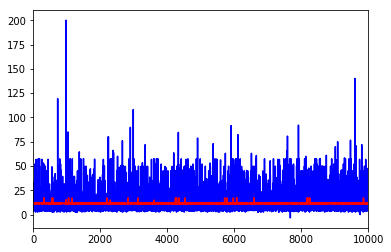

In [342]:
training_set.head()
#print(training_set.iloc[:,0:1].shape)
#print(Y_predictions)
Y_test=np.asarray(dev_set['fare_amount'])
#print(Y_predictions.shape)
#print(Y_test.shape)
#plt.hold(True)
plt.plot(Y_test, color = 'blue')
plt.plot(Y_predictions, color = 'red')
plt.xlim(1,10000)

## RMSE

In [351]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, Y_predictions))
print(rms)


10.056597740789623
